In [1]:
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
dbname='paxstock.db'
#fontprop=fn.FontProperties

In [2]:

def seldb():
    with sqlite3.connect(dbname) as conn:
        cur=conn.cursor() #커서는 하나씩 일을해나가는것
        sql="""
        select 
        IDX,EPRICE,SPRICE,HPRICE,LPRICE,UDCODE,UDOWN,UDRATE,TRQTY
        from kospi 
        order by IDX
        """
        data=cur.execute(sql).fetchall()
        xdata=[]
        Ey=[]
        Sy=[]
        Hy=[]
        Ly=[]
        #UCODE,UDOWN
        Ury=[]
        Qty=[]
        i=0
        for d in data:
            
            xdata.append(i)
            Ey.append(d[1])
            Sy.append(d[2])
            Hy.append(d[3])
            Ly.append(d[4])
            Ury.append(d[7])
            Qty.append(d[8])
            i+=1
            #print(d,end="\n")
            
            conn.commit() #최종확인
            cur.close()
            #print('total :',i)
        return (xdata,Ey,Sy,Hy,Ly,Ury,Qty)

In [3]:
def baseline(data,seed,day):
    if (seed- day)<0:
        st=0
    else:
        st=seed-day
        
    da=data[(seed-day):seed]
    res=np.average(da)
    #print(res)
    return res
    

In [4]:
baseline([1,2,3,4,5],5,3)

4.0

In [5]:
def checkcross(mdata):
    i=1
    lm=len(mdata)
    presign=1
    result=[]
    for m in mdata:
        #음수에서 양수로 바뀌면 데드크로스, 그 반대면 골든 크로스
        if (m==0):
            if(i>0):
                presign=mdata[i-1]/abs(mdata[i-1])
                #+1-1=0 //+1-(-1)=2 // (-1)-1=-2 //(-1)-(-1)=0
            else:
                presign=1

            if(i<lm):
                nextsign=mdata[i+1]/abs(mdata[i+1])
            else:
                nextsign=1
            crossresult=presign-nextsign
            if(crossresult==2):
                result.append((i+1),-1)
            elif(crossresult==-2):
                result.append((i+1),1)
                
        i+=1
    return result
            
        

In [6]:
def movinga(data,day):
    i=0
    res=[]
    for d in data:
        i+=1
        
        
        res.append(baseline(data,i,day))
    res=np.array(res)
    return res

In [7]:
def showit():
    data=seldb()
    data=np.array(data)
    no=200
    
    x=data[0][:no]
    Ey=data[1][:no]
    Sy=data[2][:no]
    Hy=data[3][:no]
    Ly=data[4][:no]
    #UCODE,UDOWN
    Ury=data[5][:no]
    Qty=data[6][:no]
    Zeros=np.zeros(no)
    
    My10=movinga(Ey,10)
    My20=movinga(Ey,20)
    mcross=My10-My20
    Cpoint=checkcross(mcross)
    print(Cpoint)
    
    
    plt.title('이동평균선')
    plt.plot(x,Ey,'r--',label="End")
    plt.plot(x,My10,'g',label="My10")
    plt.plot(x,My20,'b',label="My20")
    #plt.plot(x,Hy,'y*',label="High")
    #plt.plot(x,Ly,'b^',label="Low")
    
    
    plt.legend()
    plt.show()
    plt.title('크로스그래프')
    plt.legend
    plt.plot(x,mcross,'y',label="mcross")
    plt.plot(x,Zeros,'k',label="Zeors")
    #print(len(data))
    

def seltitle():
    fig=plt.figure(figsize=(30,60))
    with sqlite3.connect(dbname) as conn:
        cur=conn.cursor() #커서는 하나씩 일을해나가는것
        sql= 'select TIDX, TNAME from titles order by TIDX'
        
        data=cur.execute(sql).fetchall()
        i=0
        for d in data:
            gdata=seldb(d[0])
            if (len(gdata[0])>1):
                #print("*"*20)
                #print(d[1])
                #print("*"*20)
                #print(d,end="\n")
                pos=divmod(i,3)
                i+=1
                plt.subplot(3,10,i)
                x_=gdata[0]
                y_=gdata[1]
                #y=wx_+b
                A=np.vstack([x_,np.ones(len(x_))]).T
                w,b = np.linalg.listsq(A,y_)[0]
                x_=np.ndarray(gdata[0])
                plt.plot(x_,y_,'ro', label="DATA")
                plt.plot(x_,w*x_+b,'b', lacel="FIT")
                plt.legend()
                
                plt.title(d[1])
        conn.commit() #최종확인
        cur.close()
        return (xdata,ydata)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:392: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[]


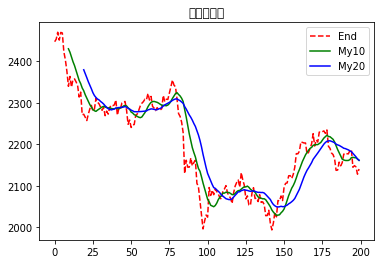

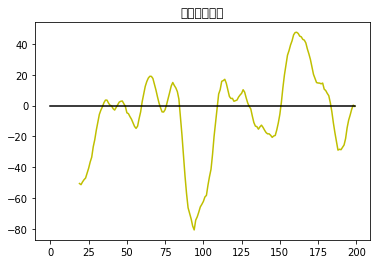

In [8]:
showit()